## Deep Learning - Lab 02

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Trong bài thực hành này, ta sẽ thực hiện training model với mạng VGG16 trên tập dữ liệu **cifar10** gồm 10 labels: airplane,	automobile,	bird,	cat, deer, dog, frog,	horse, ship and	truck.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

nb_classes = len(np.unique(y_train))

X_train, X_test = X_train/255.0, X_test/255.0

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=11)
print(">> Shape of training set: ", X_train.shape)
print(">> Shape of validation set: ", X_valid.shape)
print(">> Shape of testing set: ", X_test.shape)

>> Shape of training set:  (45000, 32, 32, 3)
>> Shape of validation set:  (5000, 32, 32, 3)
>> Shape of testing set:  (10000, 32, 32, 3)


In [3]:
def plot_history(model_history, marker=None, figsize=(15,8)):
  plt.style.use("ggplot")
  fig, ax = plt.subplots(1, 2, figsize=figsize) 

  ax[0].plot(model_history.history['loss'], color='b', marker=marker, label='Training Loss')
  ax[0].plot(model_history.history['val_loss'], color='r', marker=marker, label='Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  ax[1].plot(model_history.history['accuracy'], color='b', marker=marker, label='Training  Accuracy')
  ax[1].plot(model_history.history['val_accuracy'], color='r', marker=marker, label='Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

### VGG16 Network
Ta thực hiện xậy dựng mạng VGG16 theo sơ đồ sau:
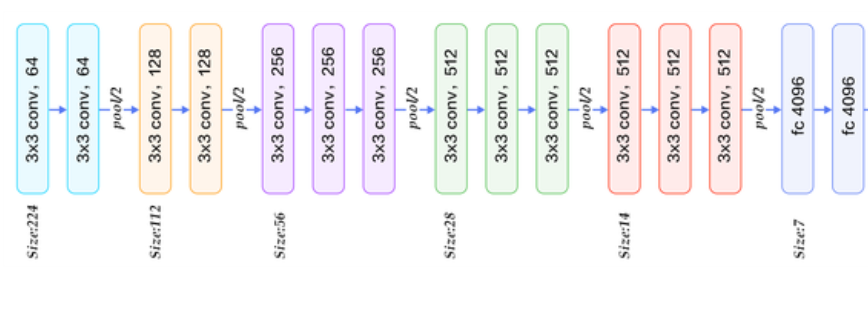

trong đó, lớp Fully-Connected thứ 3 sẽ có số nodes là 10 (ứng với số class của bộ dữ liệu cifar10) và hàm activation là softmax.

In [4]:
np.random.seed(1)
# Init
model = Sequential()
input_shape = [32,32,3]

# Block 1
model.add(Conv2D(input_shape=input_shape,
                 filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 activation='relu',
                 name='block1_conv1'))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 activation='relu',
                 name='block1_conv2'))

model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2),
                       name='block1_pool'))

# Block 2
model.add(Conv2D(filters=128,
          kernel_size=(3,3),
          padding='same',
          activation='relu',
          name='block2_conv1'))

model.add(Conv2D(filters=128,
          kernel_size=(3,3),
          padding='same',
          activation='relu',
          name='block2_conv2'))

model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2),
                       name='block2_pool'))

# Block 3
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block3_conv1'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block3_conv2'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block3_conv3'))

model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2),
                       name='block3_pool'))

# Block 4
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block4_conv1'))

model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block4_conv2'))

model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block4_conv3'))

model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2),
                       name='block4_pool'))

# Block 5
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block5_conv1'))

model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block5_conv2'))

model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 name='block5_conv3'))

model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2),
                       name='block5_pool'))

# FC1 Layer
model.add(Flatten(name='flatten'))
model.add(Dense(units=4096,
                activation='relu',
                name='fc1'))
model.add(Dropout(rate=0.5))

# FC2 Layer
model.add(Dense(units=4096,
                activation='relu',
                name='fc2'))
model.add(Dropout(rate=0.5))

# FC2 Layer
model.add(Dense(units=len(np.unique(y_train)),
                activation='softmax',
                name='predictions'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [7]:
# init Adam optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.04, decay=1e-6)

# compile model
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# callback for model checkpoint
mc = tf.keras.callbacks.ModelCheckpoint(filepath='epoch: {epoch:02d}.hdf5',
                                        monitor='val_loss',
                                        mode='min',
                                        verbose=0,
                                        save_best_only=False)

# fine-tune the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    steps_per_epoch=X_train.shape[0]//128,
                    validation_data=(X_valid, y_valid),
                    # validation_steps=10,
                    callbacks=[mc])

Epoch 1/30
351/351 [==============================] - 15s 35ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0954
Epoch 2/30
351/351 [==============================] - 13s 34ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 3/30
351/351 [==============================] - 12s 34ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3023 - val_accuracy: 0.1468
Epoch 4/30
351/351 [==============================] - 12s 34ms/step - loss: 2.3020 - accuracy: 0.1069 - val_loss: 2.3011 - val_accuracy: 0.1442
Epoch 5/30
351/351 [==============================] - 12s 34ms/step - loss: 2.2907 - accuracy: 0.1505 - val_loss: 2.2386 - val_accuracy: 0.1866
Epoch 6/30
351/351 [==============================] - 12s 34ms/step - loss: 2.1722 - accuracy: 0.1789 - val_loss: 2.0815 - val_accuracy: 0.2224
Epoch 7/30
351/351 [==============================] - 12s 34ms/step - loss: 2.0737 - accuracy: 0.2243 - val_loss: 2.0461 - val_accuracy:

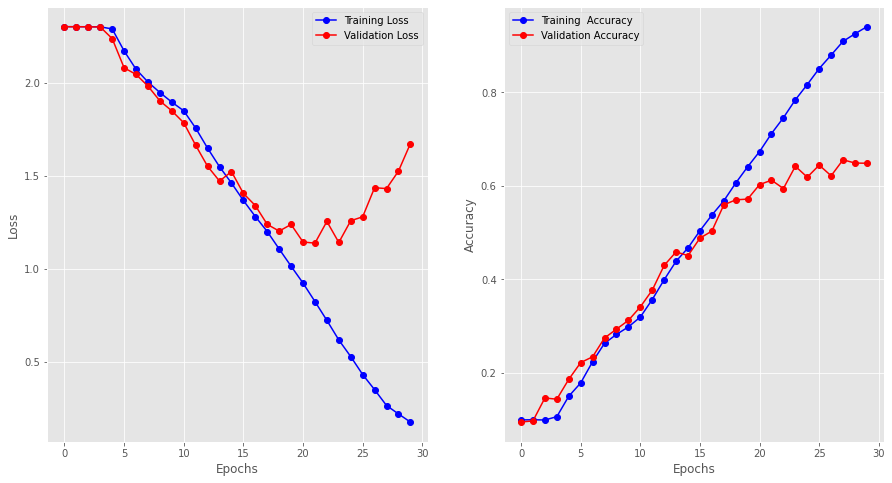

In [8]:
plot_history(history, marker='o', figsize=(15,8))

Từ đồ thị trên, ta thấy rằng từ epoch thứ 18, hai đường biểu diễn loss và accuracy tương ứng cho training và validation bắt đầu có sự chênh lệch ngày càng tăng:
* Đối với training, loss vẫn giảm đều theo từng epoch tiếp theo, tương ứng accuracy tăng đều sau epoch thứ 19.
* Đối với validation, loss bắt đầu có dấu hiệu tăng và tăng mạnh ở các epoch sau đó, tương ứng với accuracy, sau epoch thứ 18, accuracy bắt đầu giảm hoặc không đổi, chỉ dao động trong một mức nhất định.

Từ đó cho thấy rằng, sau epoch thứ 18, model càng ngày càng bị overfitting. Do đó, ta sẽ chọn epoch 18 làm best model hay làm cho model tốt nhất.

In [9]:
model = tf.keras.models.load_model("/content/epoch: 18.hdf5")
result = model.evaluate(X_test, y_test)
print("Loss and Accuracy on testing set: {} - {}".format(result[0],result[1]))

313/313 [==============================] - 3s 7ms/step - loss: 1.2113 - accuracy: 0.5677
Loss and Accuracy on testing set: 1.2113138437271118 - 0.5677000284194946
